# 2. Regression

packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importation des données

In [2]:
PATH = 'data/'
DATA = 'auto-mpg.csv'
HEADER = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
feature_name = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
target_name = 'mpg'

séparation des données, pour avoir les features et la classe target

In [3]:
dataset = pd.read_csv(PATH+DATA, sep=',', na_values='?', header=None, names=HEADER)
X = dataset[feature_name]
y = dataset[target_name]

## Arbre de régression

### Préparation des données

Modèle d'arbre de régression  
Entrainement du modèle

- Traitement données manquantes
la colonne 'horsepower' possède des données manquantes, il s'agit d'une colonne numérique, la colonne prend de nombreuses valeurs, on choisit de remplacer les données manquantes par la moyenne (`SimpleImputer`)
- Colonnes nominales
L'arbre de régression ne prend pas de colonne d'entrée nominales. On utilise un (`OneHotEncoder`) pour les colonnes nominales.  
Pour chaque colonne nominale, chaque valeurs de la colonne donnera un nouvelle attribut binaire composé de 0 ou 1, si l'échantillon avait bien la valeur dans la colonne.  
Un exemple :  

| Couleur |
|----------|
| rouge | 
| rouge |
| bleu |

donne  

| Couleur=bleu | Couleur=rouge |
|----------|----------|
| 1 |  0 | 
| 1 | 0 |
| 0 | 1 |

- Pas de traitement
On peut preciser à la pipeline de ne pas traiter certaines colonnes (`FunctionTransformer`, sans paramètre il s'agit de la fonction identité)

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.tree import DecisionTreeRegressor

same_columns = ['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
encode_columns = ['car name']
imput_columns = ['horsepower']

encoder = OneHotEncoder()
identity = FunctionTransformer()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
preprocesser = ColumnTransformer([('identity', identity, same_columns), ('imputer', imputer, imput_columns), ('encoder', encoder, encode_columns)])

tree = DecisionTreeRegressor()

model = make_pipeline(preprocesser, tree)

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('identity',
                                                  FunctionTransformer(),
                                                  ['cylinders', 'displacement',
                                                   'weight', 'acceleration',
                                                   'model year', 'origin']),
                                                 ('imputer', SimpleImputer(),
                                                  ['horsepower']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['car name'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [5]:
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('identity',
                                                  FunctionTransformer(),
                                                  ['cylinders', 'displacement',
                                                   'weight', 'acceleration',
                                                   'model year', 'origin']),
                                                 ('imputer', SimpleImputer(),
                                                  ['horsepower']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['car name'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

### Visualisation de l'arbre

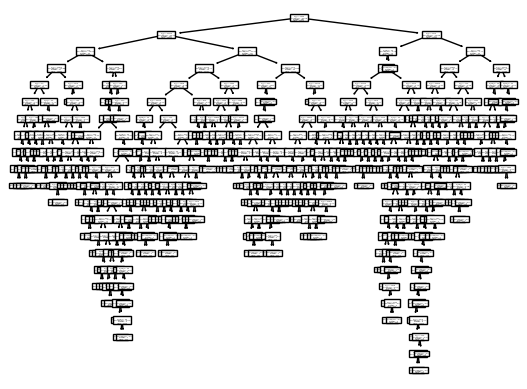

In [6]:
from sklearn import tree

model_tree = model['decisiontreeregressor']
tree.plot_tree(model_tree)
plt.show()

### Recherche des attributs

Regardons les attributs données par le prétraitement et notons les attributs dans une variable

In [10]:
X_new = preprocesser.fit_transform(X)

X_new = pd.DataFrame(X_new.toarray())

# on compare les deux dataframes
print(X_new.head())
print(X.head())

   0      1       2     3     4    5      6    7    8    9    ...  302  303  \
0  8.0  307.0  3504.0  12.0  70.0  1.0  130.0  0.0  0.0  0.0  ...  0.0  0.0   
1  8.0  350.0  3693.0  11.5  70.0  1.0  165.0  0.0  0.0  0.0  ...  0.0  0.0   
2  8.0  318.0  3436.0  11.0  70.0  1.0  150.0  0.0  0.0  0.0  ...  0.0  0.0   
3  8.0  304.0  3433.0  12.0  70.0  1.0  150.0  0.0  0.0  0.0  ...  0.0  0.0   
4  8.0  302.0  3449.0  10.5  70.0  1.0  140.0  0.0  0.0  0.0  ...  0.0  0.0   

   304  305  306  307  308  309  310  311  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 312 columns]
   cylinders  displacement  horsepower  weight  acceleration  model year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2        

Les attributs obtenus suivent l'ordre du prétraitement

In [33]:
X_feature_names = ['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin'] + ['horsepower']
car_names_attributes = model['columntransformer'].transformers_[2][1].get_feature_names_out(encode_columns)

X_feature_names += car_names_attributes.tolist()

312


### Importances des attributs

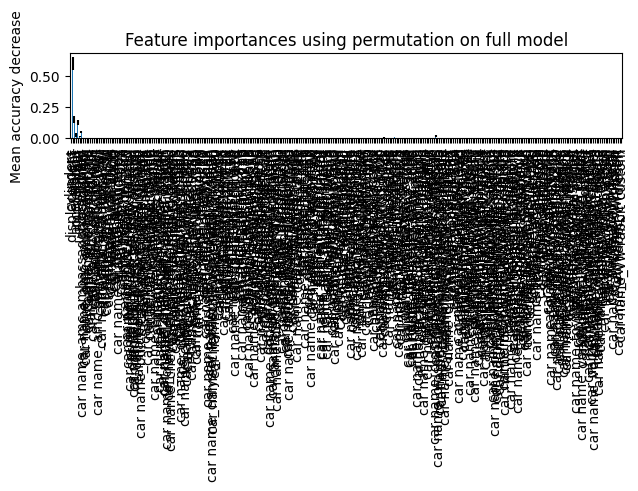

'\nfig = plt.figure(figsize=(20, 15)) # Set plot size (denoted in inches)\nplt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align=\'center\')\nplt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])\n\nplt.xlabel("Feature importance") # Add x axis\nplt.ylabel("Feature") # Add y axis\nplt.show()\n'

In [36]:

from sklearn.inspection import permutation_importance

feature_importance = model_tree.feature_importances_

feature_importance_dataframe = pd.Series(feature_importance, index=X_feature_names)

result = permutation_importance(
    model_tree, X_new, y, n_repeats=10, random_state=42, n_jobs=2
)

fig, ax = plt.subplots()
feature_importance_dataframe.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

On pouvait si attendre, il y a en tout 312 attribut, l'image est très diffcile à lire, à cause des attributs obtenus avec `car name`

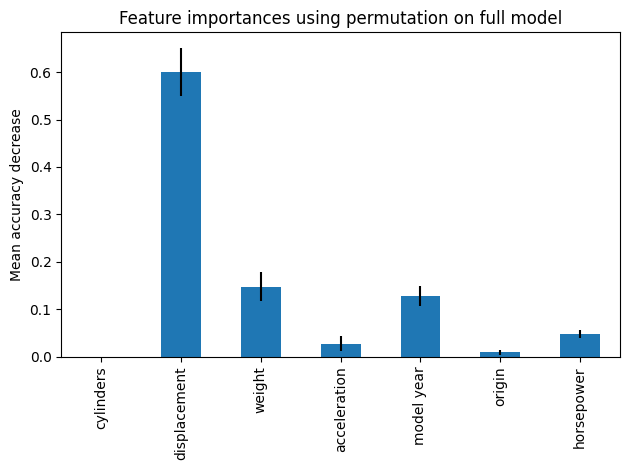

In [46]:
first = ['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin'] + ['horsepower']
feature_importance_dataframe_reduced = feature_importance_dataframe[first]
std_reduced = result.importances_std[:len(first)]

fig, ax = plt.subplots()
feature_importance_dataframe_reduced.plot.bar(yerr=std_reduced, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [48]:
feature_importance_dataframe['cylinders']

3.29861874153311e-06

On se basant sur la méthode de permutation. on observe que :
- on ne voit pas la valeur pour `cylinders`, c'est parce qu'elle est très faible
- à l'exception de `car name`, `displacement` est la variable la plus importante car c'est elle qui fait le plus diminuer l'accuracy, suivi de `weight` et `model year`

### Mesures d'erreurs

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_predicted = model.predict(X)

mean_absolute_error = mean_absolute_error(y, y_predicted)
print(f"Mean absolute error : {mean_absolute_error:.2f}")

mean_squared_error = mean_squared_error(y, y_predicted)
print(f"Mean squared error : {mean_squared_error:.2f}")

r2_score = r2_score(y, y_predicted)
print(f"R^2 : {r2_score:.2f}")

Mean absolute error : 0.00
Mean squared error : 0.00
R^2 : 1.00


Les résultats sont parfaits puisque l'arbre c'est entraîné sur toutes les données sans conditions d'arrêt (max profondeur par exemple)